# 문제 #1.


> 연봉 데이터를 불러들여 2016년 데이터만 "salary16"에 저장하고 (행=개체, 열=변수)크기를 출력하시오. (853X5)

> 타자 데이터를 불려들러 2016년 데이터만 "batting16"에 저장하시오. (행=개체, 열=변수)크기를 출력하시오. (1483X22)





In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
Salaries=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
salary16 = Salaries[Salaries.yearID==2016]
print(salary16.shape)
import pandas as pd
Batting=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Batting.csv')
Batting16 = Batting[Batting.yearID==2016]
print(Batting16.shape)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
(853, 5)
(1483, 22)


# 문제 #2.


> salary16 데이터프레임과 batting16 데이터프레임을 "playerID"에 의해 결합하고 "salary_bat"에(901X26) 저장하시오. 그리고 다음 함수를 사용하여 중복 데이터를 제거한 후 'sb_df'에 저장하시오(812X26).


>sb_df=salary_bat.drop_duplicates(['playerID'])




In [3]:
salary_bat = pd.merge(salary16,Batting16,how='inner',on='playerID')
salary_bat.shape
sb_df=salary_bat.drop_duplicates(['playerID'])
print('최종 데이터 크기', sb_df.shape)

최종 데이터 크기 (812, 26)


# 문제 #3.


> 2015년 MLB 선수(sb_df데이터 사용) 연봉 평균(mean)과 중앙값(median)을 출력하시오.



In [4]:
print('평균=',sb_df.salary.mean(),'중앙값',sb_df.salary.quantile(0.5))

평균= 4486929.42364532 중앙값 1590000.0


In [5]:
sb_df.salary.mean()>sb_df.salary.quantile(0.5) #부울연산자

True

In [6]:
sb_df.salary.describe()

count    8.120000e+02
mean     4.486929e+06
std      5.923936e+06
min      5.075000e+05
25%      5.205000e+05
50%      1.590000e+06
75%      6.167500e+06
max      3.300000e+07
Name: salary, dtype: float64

# 문제4.


> 2015년 MLB 선수 연봉에 대한 Kernel Density estimate plot을 그리고 해석하시오.



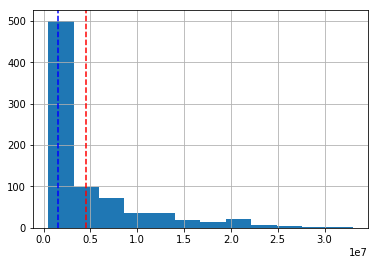

In [7]:
import matplotlib.pyplot as plt
sb_df.salary.hist(bins=12) #bins = 막대
plt.axvline(x=sb_df.salary.mean(), color='r', linestyle='--')
plt.axvline(x=sb_df.salary.median(), color='b', linestyle='--')

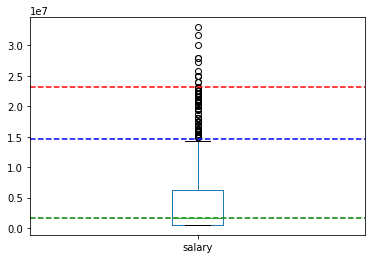

In [8]:
import matplotlib.pyplot as plt
sb_df.salary.plot.box()
IQR = sb_df.salary.quantile(0.75)-sb_df.salary.quantile(0.25)
Q3 = sb_df.salary.quantile(0.75)
Q2 = sb_df.salary.quantile(0.5)
Q1 = sb_df.salary.quantile(0.25)
plt.axhline(y=Q3+3*IQR, color='r', linestyle='--')
plt.axhline(y=Q3+1.5*IQR, color='b', linestyle='--')
plt.axhline(y=Q2, color = 'g', linestyle='--')

# 문제5.


> 위의 커널확률밀도함수를 해석하시오.

오른쪽으로 꼬리가 긴 모양을 나타낸다. median<mean

# 문제6.


> 'sb_df' 데이터프레임에서 teamID_x(연봉 데이터와 배팅 데이터에 teamID 변수명이 중복되어 앞의 것은 teamID_x, 뒤에 것은 team_ID_y로 저장되어 있음) 별 연봉 평균을 구하시오. 

In [9]:
sb_df_mean = sb_df.groupby('teamID_x')['salary'].mean()
sb_df_mean

teamID_x
ARI    3.363041e+06
ATL    2.575328e+06
BAL    5.581498e+06
BOS    6.714509e+06
CHA    4.519947e+06
CHN    5.866333e+06
CIN    3.158288e+06
CLE    2.752293e+06
COL    3.600841e+06
DET    6.684844e+06
HOU    3.389061e+06
KCA    4.741190e+06
LAA    4.670053e+06
LAN    6.462981e+06
MIA    2.916085e+06
MIL    2.490661e+06
MIN    4.436443e+06
NYA    7.945446e+06
NYN    5.128572e+06
OAK    3.157135e+06
PHI    1.683981e+06
PIT    3.706387e+06
SDN    3.881354e+06
SEA    5.114744e+06
SFN    6.890151e+06
SLN    4.691768e+06
TBA    2.039190e+06
TEX    5.429954e+06
TOR    4.782817e+06
WAS    5.645330e+06
Name: salary, dtype: float64

# 문제7.


> Team 중 연봉이 가장 높은 팀과 가장 낮은 팀을 적으시오. (6번 결과 값을 보고 판단하여도 되나? 결과를 저장한 후 코드 사용하여 출력하면 가산점 있음)

In [10]:
sb_df_mean = sb_df.groupby('teamID_x')['salary'].mean()
print(sb_df_mean.sort_values().head(1))
print(sb_df_mean.sort_values().tail(1))
print('가장 높은 팀 = NYA, 가장 낮은 팀 = PHI')

teamID_x
PHI    1.683981e+06
Name: salary, dtype: float64
teamID_x
NYA    7.945446e+06
Name: salary, dtype: float64
가장 높은 팀 = NYA, 가장 낮은 팀 = PHI


문제7-1. 선수 연봉 10번째 선수를 찾으시오.

In [11]:
sb_df['rank'] = sb_df.salary.rank(ascending = False)
sb_df[sb_df['rank']== 9.0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,yearID_x,teamID_x,lgID_x,playerID,salary,yearID_y,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,rank
134,2016,CHN,NL,lestejo01,25000000,2016,1,CHN,NL,33,59,3,6,3,0,0,6.0,0.0,0.0,6,18.0,0.0,0.0,10.0,0.0,2.0,9.0
372,2016,LAA,AL,pujolal01,25000000,2016,1,LAA,AL,152,593,71,159,19,0,31,119.0,4.0,0.0,49,75.0,6.0,2.0,0.0,6.0,24.0,9.0
562,2016,NYA,AL,sabatcc01,25000000,2016,1,NYA,AL,30,1,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,9.0


In [12]:
sb_df['rank'] = sb_df.salary.rank(ascending = False,method='min')
#sb_df.sort_values(by = 'rank')
sb_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,yearID_x,teamID_x,lgID_x,playerID,salary,yearID_y,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,rank
0,2016,ARI,NL,ahmedni01,521600,2016,1,ARI,NL,90,284,26,62,9,1,4,20.0,5.0,2.0,15,58.0,3.0,4.0,2.0,3.0,9.0,600.0
1,2016,ARI,NL,barreja01,507500,2016,1,ARI,NL,68,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,782.0
2,2016,ARI,NL,brachsi01,509300,2016,1,ARI,NL,26,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,762.0
3,2016,ARI,NL,britoso01,508500,2016,1,ARI,NL,40,95,10,17,3,1,4,12.0,2.0,0.0,2,23.0,0.0,0.0,0.0,0.0,3.0,769.0
4,2016,ARI,NL,castiwe01,3700000,2016,1,ARI,NL,113,416,41,110,24,0,14,68.0,2.0,0.0,33,121.0,3.0,4.0,0.0,4.0,5.0,292.0
5,2016,ARI,NL,chafian01,519700,2016,1,ARI,NL,32,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,625.0
6,2016,ARI,NL,clippty01,6100000,2016,1,ARI,NL,40,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,206.0
8,2016,ARI,NL,corbipa01,2525000,2016,1,ARI,NL,38,49,7,15,3,1,0,4.0,0.0,1.0,1,14.0,0.0,0.0,3.0,0.0,0.0,354.0
9,2016,ARI,NL,delarru01,2350000,2016,1,ARI,NL,13,14,0,1,0,0,0,1.0,0.0,0.0,0,3.0,0.0,0.0,3.0,0.0,1.0,370.0
10,2016,ARI,NL,delgara01,1275000,2016,1,ARI,NL,79,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,437.0


# 문제8.


> 'sb_df' 데이터에서 5% 데이터만 랜덤 추출하여 'sample' 데이터 프레임으로 저장하시오. (~,test_size=???, random_state=919) 사용 - 동일값을 얻는다.

In [0]:
from sklearn.model_selection import train_test_split
sample_data, X_test = train_test_split(sb_df, test_size = 0.95, random_state=919)
print(sample_data.shape,'***',X_test.shape)

(40, 26) *** (776, 26)


# 문제9.


> sample 데이터를 이용하여 MLB 2015년 선수 연봉에 대한 95% 신뢰구간을 구하시오.

In [0]:
import math
print('신뢰구간 하한=',sample_data.salary.mean()-1.96*sample_data.salary.std()/math.sqrt(40),'상한=',sample_data.salary.mean()+1.96*sample_data.salary.std()/math.sqrt(40))

신뢰구간 하한= 2418940.6269424036 상한= 5321398.223057596


# 문제10.

> 문제3에서 구한 2015년 선수 전체 평균이 신뢰구간 안에 있는가? 


> 있다면 혹은 없다면 이것은 무엇을 의미하는가?

(기술)



문제3에서 구한 2015년 선수 전체 평균은 4303483.540441177으로 신뢰구간 안에 포함되어 있습니다. 즉, 표본은 95% 신뢰할 수 있습니다.